In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=True)
calibrator.create_all_teams()
calibrator.process_data()
teams=calibrator.teams
calibrator.get_current_results('BPL').tail(10)

Force recalibrate
calibration.pkl  exists.


,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17120,2019-01-01,BPL,Everton,Leicester City,0,1,1.03,0.58,1.74,0.59
17130,2019-01-01,BPL,Arsenal,Fulham,4,1,4.46,1.51,3.01,0.73
17158,2019-01-01,BPL,Cardiff City,Tottenham Hotspur,0,3,0.90,1.57,0.83,0.74
17164,2019-01-02,BPL,Huddersfield Town,Burnley,1,2,0.81,2.88,0.84,1.27
17165,2019-01-02,BPL,Wolverhampton,Crystal Palace,0,2,0.83,2.00,0.55,0.69
17166,2019-01-02,BPL,AFC Bournemouth,Watford,3,3,3.24,0.95,2.15,1.50
17167,2019-01-02,BPL,Chelsea,Southampton,0,0,0.99,0.19,1.58,0.45
17168,2019-01-02,BPL,West Ham United,Brighton and Hove Albion,2,2,0.90,0.84,1.36,0.83
17169,2019-01-02,BPL,Newcastle,Manchester United,0,2,0.64,2.34,0.95,1.46
17174,2019-01-03,BPL,Manchester City,Liverpool,2,1,1.01,1.52,1.11,1.62


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF5200C0F0>,
      dtype=object)

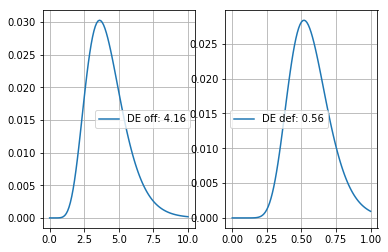

In [9]:
calibrator.processed_matches['de_2018-08-10_peczwolle_heerenveen'].league_team_of_home_team.plt()

In [3]:
Teams=dict()
League=dict()

In [4]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
SPD,0,19.0,12,25,4,1,44.49,96.64,4.20,0.25,9.71,3.1500
GB,0,18.5,12,25,4,1,40.76,95.84,5.36,0.36,11.76,3.4304
BPL,0,13.6,7,20,6,1,7.75,73.08,3.46,0.35,49.58,2.2490
ISA,0,12.1,6,19,6,2,3.71,59.49,2.71,0.33,66.10,1.8157
DE,0,10.7,4,17,6,2,2.17,43.44,4.16,0.56,77.50,1.8304
FL1,0,9.5,4,16,6,3,1.12,31.51,3.35,0.51,85.35,1.6415


In [5]:
country='BPL'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=4)

League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
League[country].season_report()

[0.1672616  0.94443957]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,54,96.6,90,103,2,1,82.10,100.00,5.59,0.14,0.00
Manchester City,50,90.7,83,97,3,1,17.15,99.94,6.64,0.26,0.00
Tottenham Hotspur,48,82.6,75,90,4,2,0.73,96.42,5.38,0.31,0.00
Chelsea,44,76.2,68,84,6,3,0.02,74.88,4.14,0.25,0.00
Arsenal,41,70.6,62,79,6,4,0.00,21.08,5.32,0.47,0.00
Manchester United,38,67.0,59,75,7,4,0.00,7.64,5.21,0.44,0.00
Leicester City,31,54.2,46,62,12,7,0.00,0.02,2.73,0.33,0.00
Wolverhampton,29,51.8,44,60,13,7,0.00,0.00,2.73,0.36,0.00
Watford,29,51.3,43,60,14,7,0.00,0.01,3.54,0.45,0.00
Everton,27,50.5,42,59,14,7,0.00,0.01,3.53,0.43,0.03


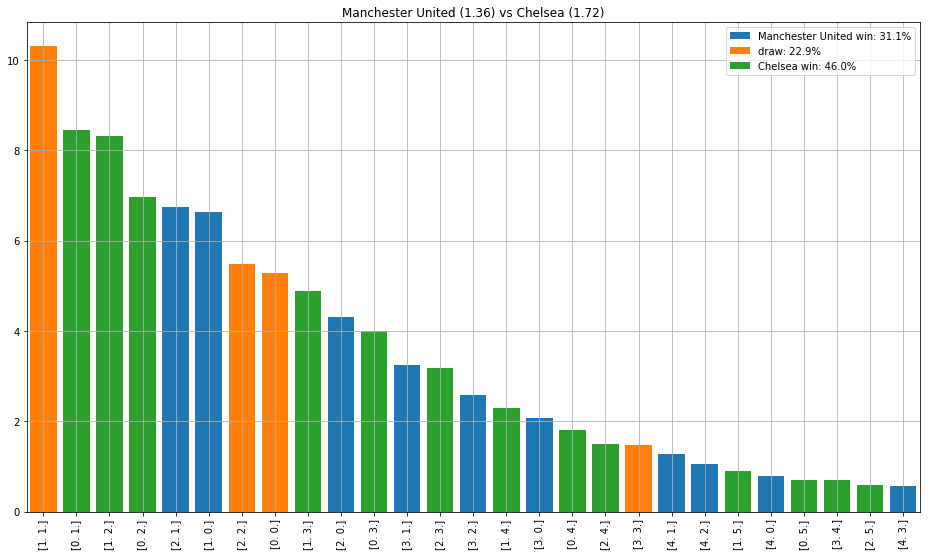

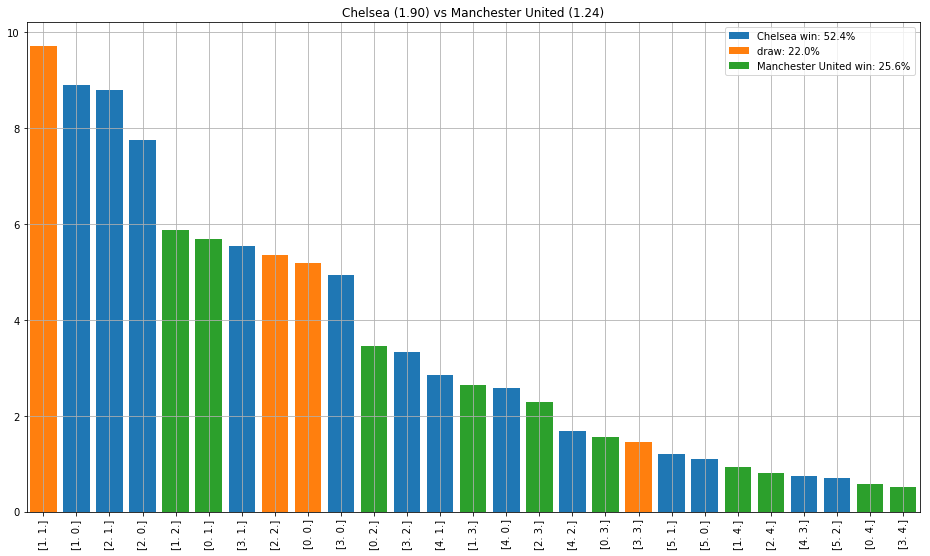

In [6]:
team1=teams['Manchester United']
team2=teams['Chelsea']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

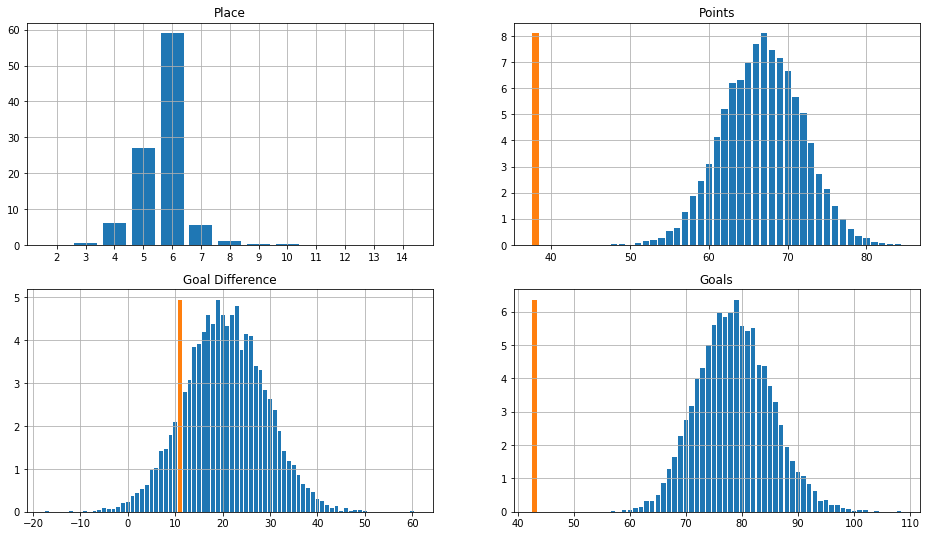

In [9]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

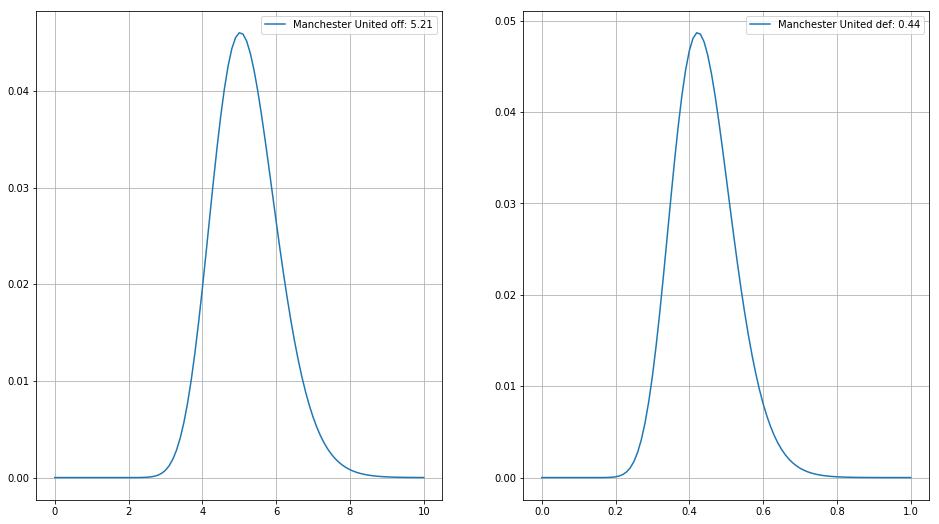

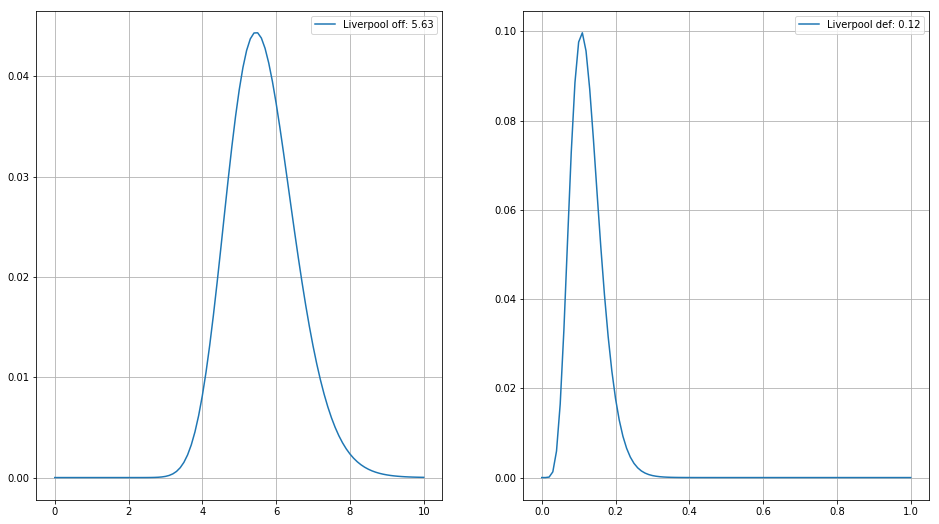

In [6]:
teams['Manchester United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
teams['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

array([6.89      , 6.98989021, 6.49350649, 5.56414219])

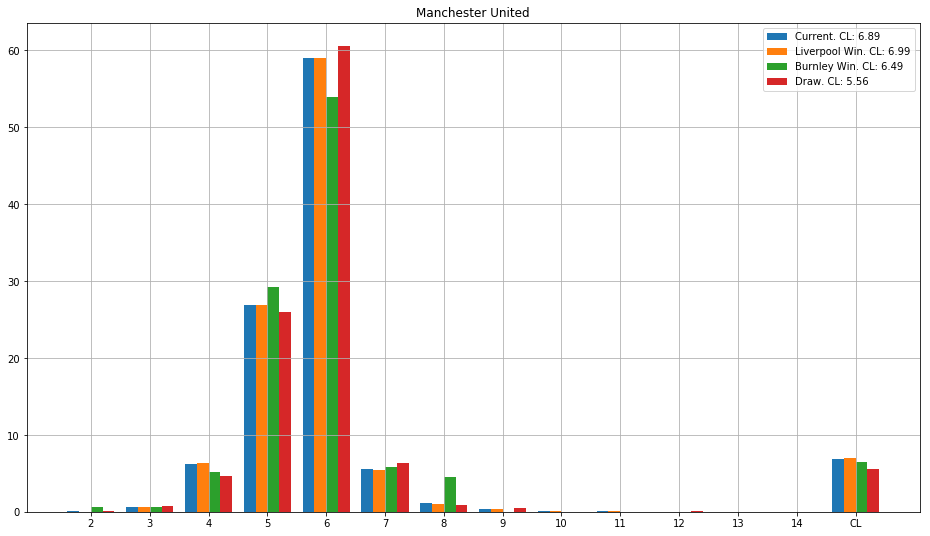

In [11]:
imp=[]
ref_team='Manchester United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=2,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
PremierLeague.what_if(the_match,ref_team=ref_team)

array([ 6.89      ,  5.11049724, 11.40275387,  6.7940552 ])

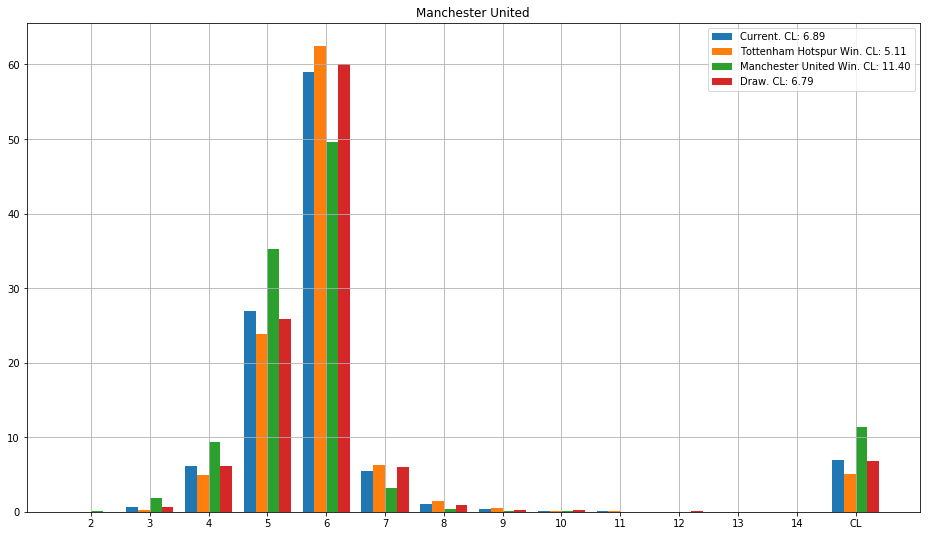

In [12]:
PremierLeague.what_if('Tottenham Hotspur v Manchester United',ref_team='Manchester United')

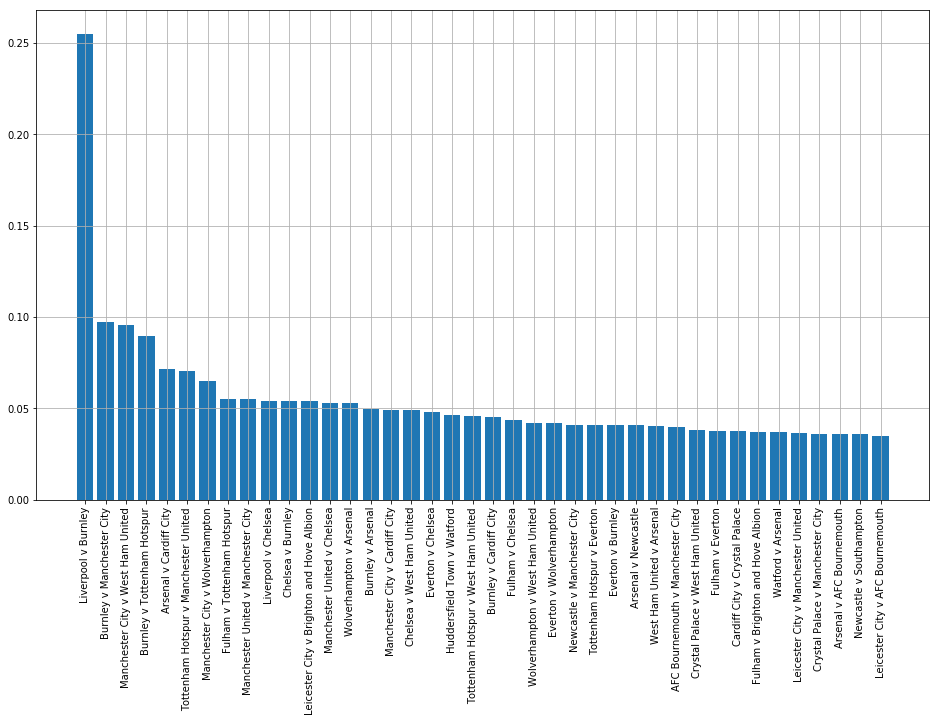

In [13]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.bar(xx,imp[xx])
plt.xticks(xx,matches[xx],rotation=90);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,9)

1.694194117647059

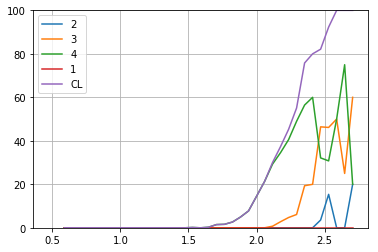

In [14]:
team_name='Manchester United'
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n